In [1]:
import os,re,sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
os.chdir("......./Desktop/HackerEarth/")

In [3]:
os.listdir()

['DecisionT.csv',
 'Rtree.csv',
 'sample_submission.csv',
 'Submission 1.csv',
 'test.csv',
 'train.csv']

In [130]:
traindata = pd.read_csv("train.csv")
testdata2 = pd.read_csv("test.csv")

In [131]:
traindata.shape

(10000, 12)

In [132]:
testdata2.shape

(2500, 11)

In [7]:
testdata.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [8]:
traindata.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [9]:
traindata.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [10]:
traindata.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [11]:
traindata['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [12]:
traindata['Severity'].value_counts()/len(traindata)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

In [13]:
traindata.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [14]:
traindata.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [15]:
traindata.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


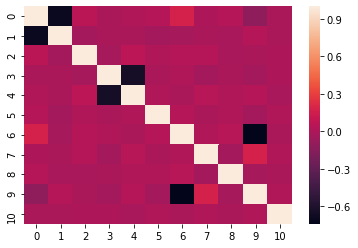

In [16]:
sns.heatmap(traindata.corr().values)

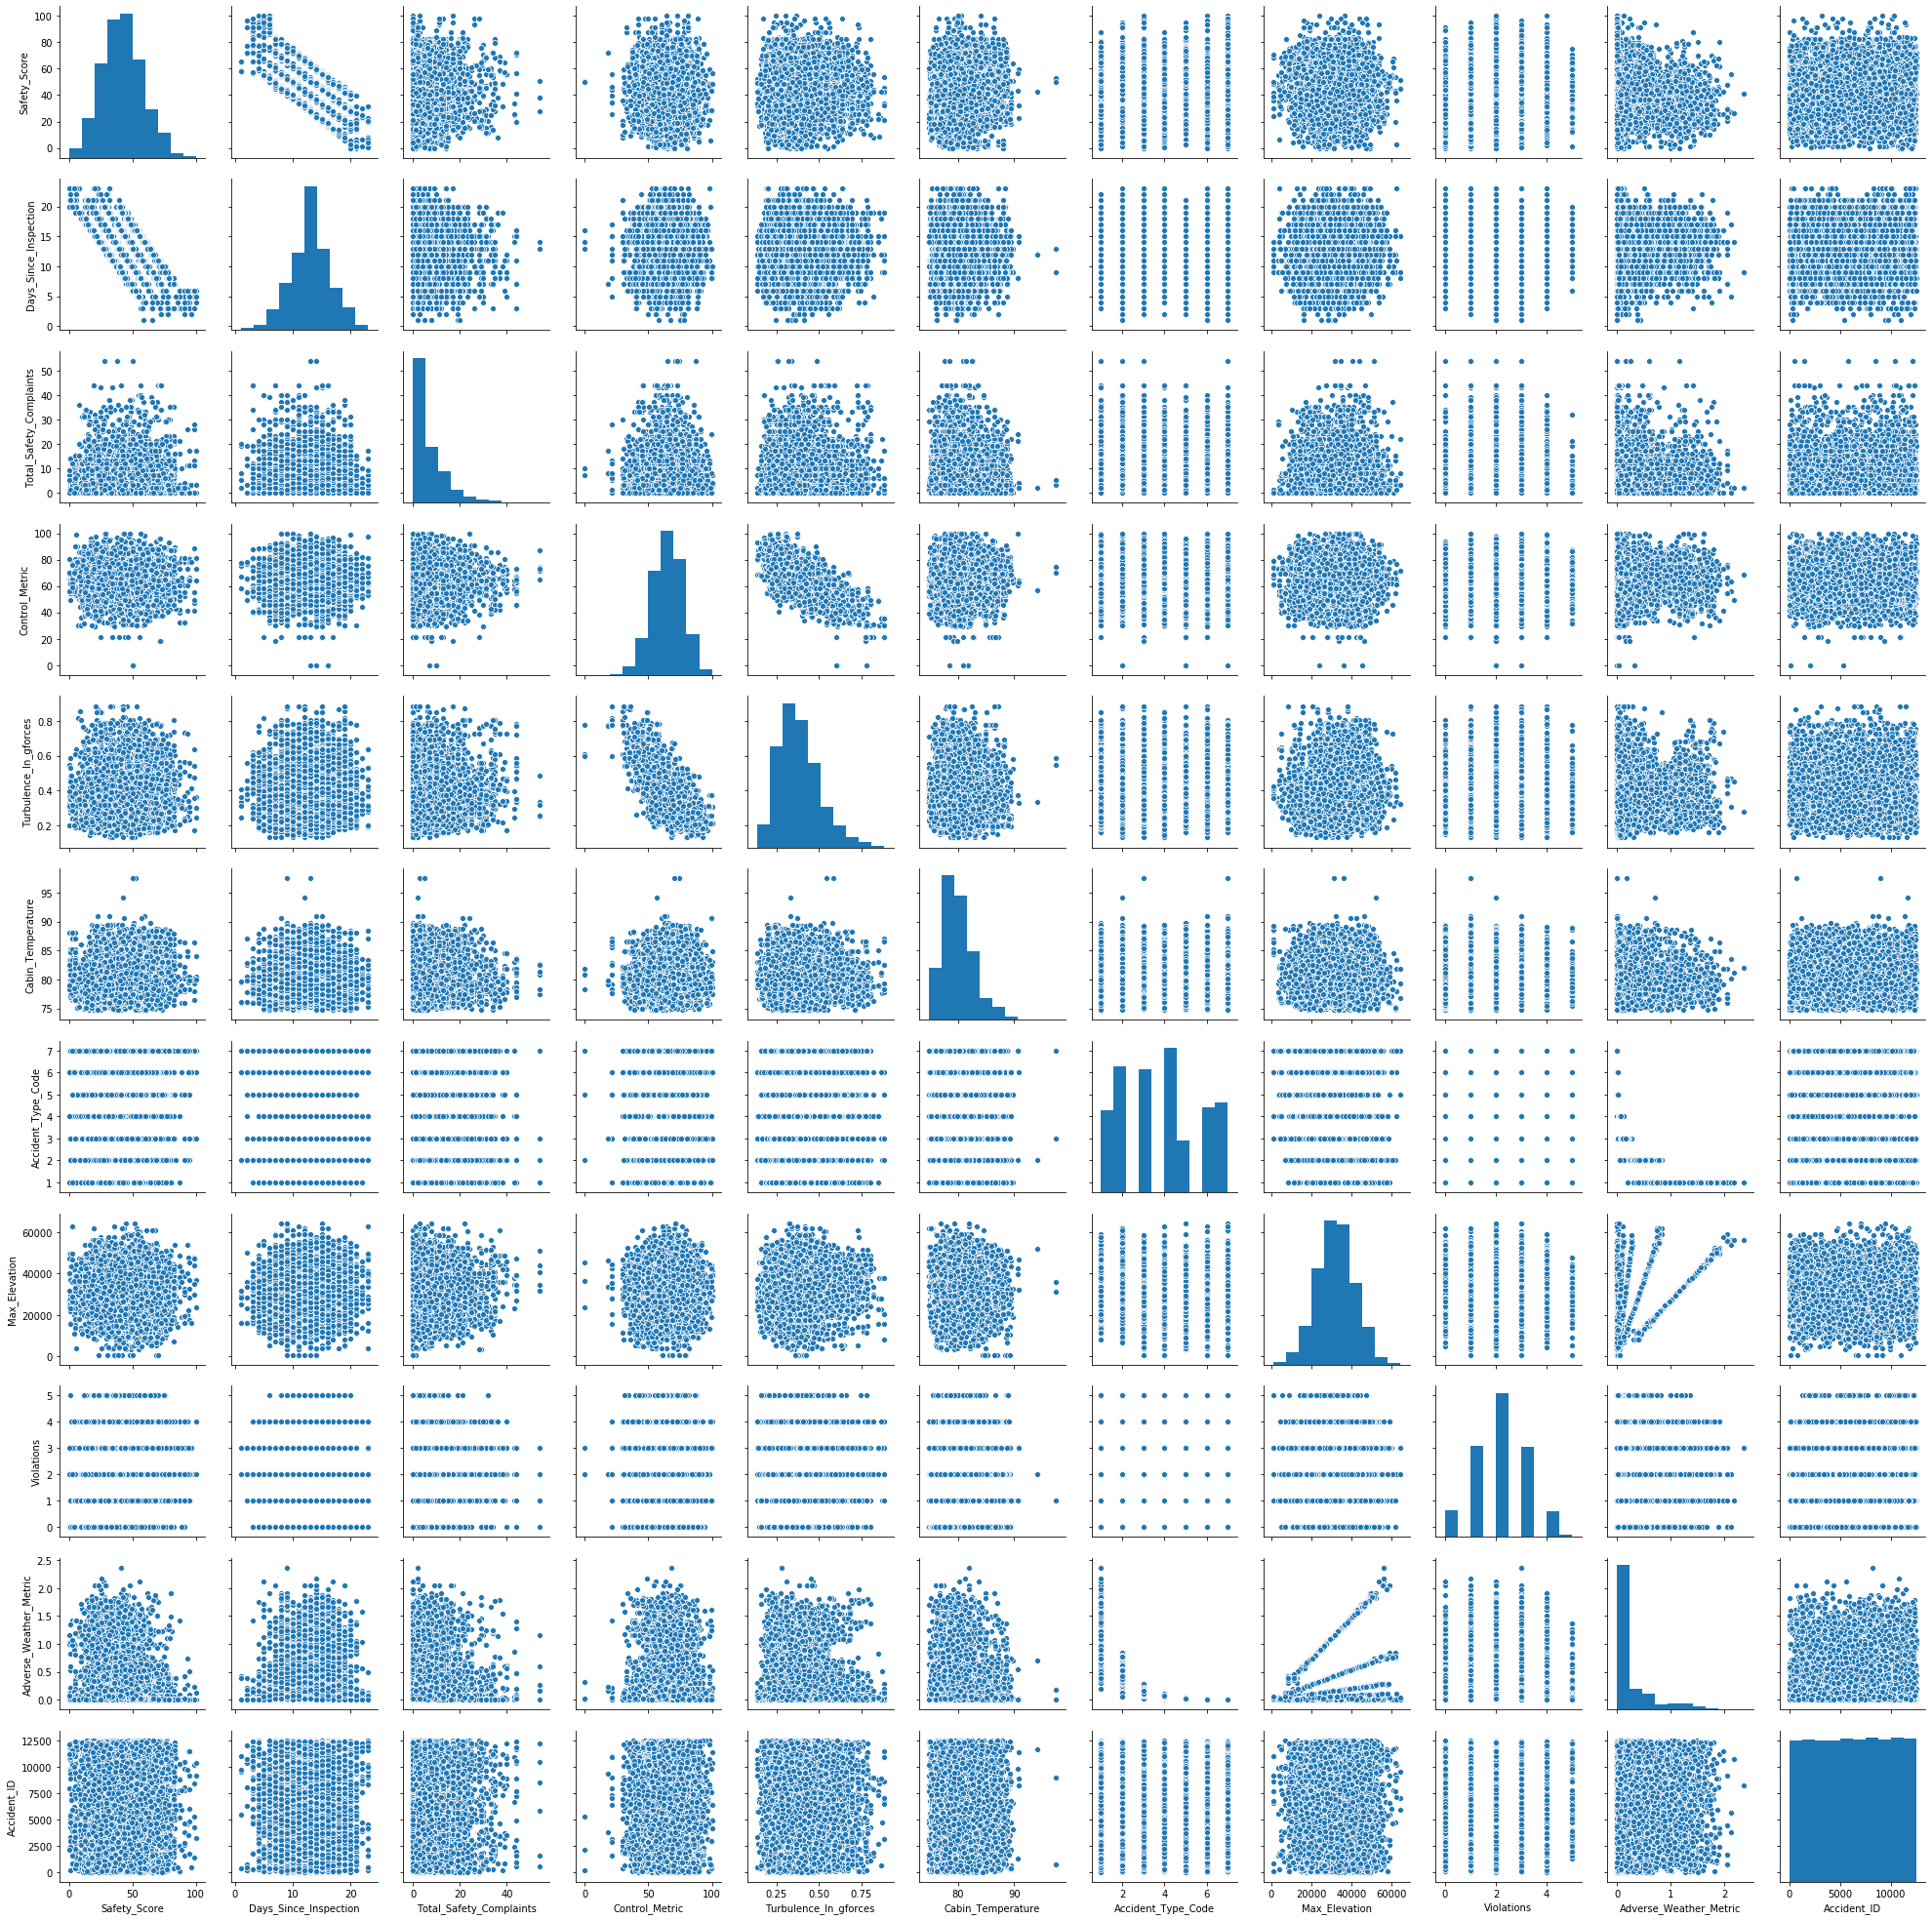

In [17]:
sns.pairplot(traindata)
plt.show()

In [18]:
traindata.groupby('Severity').size()

Severity
Highly_Fatal_And_Damaging                  3049
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Significant_Damage_And_Serious_Injuries    2729
dtype: int64

In [19]:
traindata.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [20]:
traindata[['Severity','Safety_Score']].groupby(['Severity']).agg([np.mean,np.median])

Safety_Score           
                                                mean     median
Severity                                                       
Highly_Fatal_And_Damaging                  33.353611  32.100457
Minor_Damage_And_Injuries                  47.800305  47.031963
Significant_Damage_And_Fatalities          47.102113  46.666667
Significant_Damage_And_Serious_Injuries    42.667443  41.369863

In [21]:
traindata[['Severity', 'Days_Since_Inspection']].groupby(['Severity']).agg([np.mean,np.median])

Days_Since_Inspection       
                                                         mean median
Severity                                                            
Highly_Fatal_And_Damaging                           12.764513     13
Minor_Damage_And_Injuries                           13.170162     13
Significant_Damage_And_Fatalities                   13.071386     13
Significant_Damage_And_Serious_Injuries             12.808721     13

In [22]:
traindata[['Severity', 'Total_Safety_Complaints']].groupby(['Severity']).agg([np.mean,np.median])

Total_Safety_Complaints       
                                                           mean median
Severity                                                              
Highly_Fatal_And_Damaging                              6.337160      5
Minor_Damage_And_Injuries                              6.827859      5
Significant_Damage_And_Fatalities                      6.486726      4
Significant_Damage_And_Serious_Injuries                6.622206      4

In [23]:
traindata['Total_Safety_Complaints'].head()

0    22
1    27
2    16
3     9
4    25
Name: Total_Safety_Complaints, dtype: int64

In [24]:
traindata[['Severity', 'Control_Metric']].groupby(['Severity']).agg([np.mean,np.median])

Control_Metric           
                                                  mean     median
Severity                                                         
Highly_Fatal_And_Damaging                    66.541401  66.545123
Minor_Damage_And_Injuries                    64.350232  65.132179
Significant_Damage_And_Fatalities            60.059293  57.748405
Significant_Damage_And_Serious_Injuries      67.480750  67.547858

In [25]:
traindata[['Severity', 'Turbulence_In_gforces']].groupby(['Severity']).agg([np.mean,np.median])

Turbulence_In_gforces          
                                                         mean    median
Severity                                                               
Highly_Fatal_And_Damaging                            0.367432  0.347127
Minor_Damage_And_Injuries                            0.386255  0.372009
Significant_Damage_And_Fatalities                    0.412759  0.395450
Significant_Damage_And_Serious_Injuries              0.373382  0.357224

In [26]:
traindata[['Severity','Cabin_Temperature']].groupby(['Severity']).agg([np.mean,np.median])

Cabin_Temperature       
                                                     mean median
Severity                                                        
Highly_Fatal_And_Damaging                       80.023526  79.63
Minor_Damage_And_Injuries                       79.903961  79.54
Significant_Damage_And_Fatalities               80.041516  79.56
Significant_Damage_And_Serious_Injuries         79.924478  79.43

In [27]:
traindata[['Severity', 'Accident_Type_Code']].groupby(['Severity']).agg([np.mean,np.median])

Accident_Type_Code       
                                                      mean median
Severity                                                         
Highly_Fatal_And_Damaging                         3.467366      4
Minor_Damage_And_Injuries                         3.269490      3
Significant_Damage_And_Fatalities                 4.500885      4
Significant_Damage_And_Serious_Injuries           4.282155      4

In [28]:
traindata[['Severity', 'Max_Elevation']].groupby(['Severity']).agg([np.mean,np.median])

Max_Elevation              
                                                 mean        median
Severity                                                           
Highly_Fatal_And_Damaging                31940.145431  32028.742082
Minor_Damage_And_Injuries                32225.568306  32158.504539
Significant_Damage_And_Fatalities        31300.789137  31571.349620
Significant_Damage_And_Serious_Injuries  32298.893626  32266.136231

In [29]:
traindata[['Severity', 'Violations']].groupby(['Severity']).agg([np.mean,np.median])

Violations       
                                              mean median
Severity                                                 
Highly_Fatal_And_Damaging                 1.963267      2
Minor_Damage_And_Injuries                 1.981797      2
Significant_Damage_And_Fatalities         2.175811      2
Significant_Damage_And_Serious_Injuries   1.993404      2

In [30]:
traindata[['Violations', 'Severity']].head()

,Violations,Severity
0,3,Minor_Damage_And_Injuries
1,2,Minor_Damage_And_Injuries
2,3,Significant_Damage_And_Fatalities
3,1,Significant_Damage_And_Serious_Injuries
4,2,Significant_Damage_And_Fatalities


In [31]:
traindata[['Severity', 'Adverse_Weather_Metric']].groupby(['Severity']).agg([np.mean,np.median])

Adverse_Weather_Metric          
                                                          mean    median
Severity                                                                
Highly_Fatal_And_Damaging                             0.302307  0.073123
Minor_Damage_And_Injuries                             0.311014  0.201784
Significant_Damage_And_Fatalities                     0.247845  0.043063
Significant_Damage_And_Serious_Injuries               0.157048  0.068885

In [32]:
traindata[['Adverse_Weather_Metric', 'Severity']].head()

,Adverse_Weather_Metric,Severity
0,0.424352,Minor_Damage_And_Injuries
1,0.352350,Minor_Damage_And_Injuries
2,0.003364,Significant_Damage_And_Fatalities
3,0.211728,Significant_Damage_And_Serious_Injuries
4,0.176883,Significant_Damage_And_Fatalities


In [33]:
traindata.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [34]:
traindata.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [35]:
traindata.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
traindata['Severity']=le.fit_transform(traindata['Severity'].values)

In [37]:
X = pd.DataFrame()
X['Safety_Score'] = traindata['Safety_Score']
X['Days_Since_Inspection'] = traindata['Days_Since_Inspection']
X['Total_Safety_Complaints'] = traindata['Total_Safety_Complaints']
X['Control_Metric'] = traindata['Control_Metric']
X['Turbulence_In_gforces'] = traindata['Turbulence_In_gforces']
X['Cabin_Temperature'] = traindata['Cabin_Temperature']
X['Accident_Type_Code'] = traindata['Accident_Type_Code']
X['Max_Elevation'] = traindata['Max_Elevation']
X['Violations'] = traindata['Violations']
X['Adverse_Weather_Metric'] = traindata['Adverse_Weather_Metric']

In [38]:
X.shape

(10000, 10)

In [39]:
y = traindata['Severity']

In [40]:
y.dtype

dtype('int32')

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 46)

In [279]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state = 1000)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1000, splitter='best')

In [280]:
y_pred = classifier.predict(X_test)

In [281]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [282]:
cm

array([[860,  25,  16,  20],
       [ 17, 702,  11,  39],
       [ 21,   8, 426,   8],
       [ 22,  23,  12, 790]], dtype=int64)

In [283]:
accuracy_score(y_test,y_pred)

0.926

In [284]:
testdata.shape

(2500, 12)

In [285]:
testdata.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID', 'Severity'],
      dtype='object')

In [286]:
test = pd.DataFrame()
test['Safety_Score'] = testdata['Safety_Score']
test['Days_Since_Inspection'] = testdata['Days_Since_Inspection']
test['Total_Safety_Complaints'] = testdata['Total_Safety_Complaints']
test['Control_Metric'] = testdata['Control_Metric']
test['Turbulence_In_gforces'] = testdata['Turbulence_In_gforces']
test['Cabin_Temperature'] = testdata['Cabin_Temperature']
test['Accident_Type_Code'] = testdata['Accident_Type_Code']
test['Max_Elevation'] = testdata['Max_Elevation']
test['Violations'] = testdata['Violations']
test['Adverse_Weather_Metric'] = testdata['Adverse_Weather_Metric']

In [287]:
test.shape

(2500, 10)

In [288]:
prediction = le.inverse_transform(classifier.predict(test))

In [289]:
sub = pd.DataFrame(prediction)

In [290]:
sub.shape

(2500, 1)

In [291]:
sub.head()

,0
0,Highly_Fatal_And_Damaging
1,Significant_Damage_And_Fatalities
2,Significant_Damage_And_Serious_Injuries
3,Highly_Fatal_And_Damaging
4,Highly_Fatal_And_Damaging


In [292]:
testdata['Severity'] = prediction

In [293]:
testdata.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Severity
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1,Highly_Fatal_And_Damaging
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10,Significant_Damage_And_Fatalities
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14,Significant_Damage_And_Serious_Injuries
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17,Highly_Fatal_And_Damaging
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21,Highly_Fatal_And_Damaging


In [294]:
new5 =testdata[['Accident_ID','Severity']]

In [295]:
new5.to_csv('new5.csv', index=None)

In [296]:
os.listdir()

['Boost.csv',
 'DecisionT.csv',
 'new.csv',
 'new2.csv',
 'new3.csv',
 'new4.csv',
 'new5.csv',
 'Rtree.csv',
 'sample_submission.csv',
 'Submission 1.csv',
 'test.csv',
 'train.csv']

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state = 100)


In [61]:
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [62]:
y_pred2 = classifier2.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred2)

0.9113333333333333

In [64]:
cm = confusion_matrix(y_test, y_pred2)

In [65]:
cm

array([[809,  28,  22,  18],
       [ 37, 707,  14,  13],
       [ 18,  22, 447,   6],
       [ 52,  26,  10, 771]], dtype=int64)

In [66]:
prediction2 = le.inverse_transform(classifier2.predict(test))

In [67]:
sub = pd.DataFrame(prediction2)

In [68]:
testdata['Severity'] = prediction2

In [69]:
testdata.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Severity
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1,Highly_Fatal_And_Damaging
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10,Significant_Damage_And_Fatalities
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14,Significant_Damage_And_Serious_Injuries
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17,Highly_Fatal_And_Damaging
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21,Significant_Damage_And_Fatalities


In [70]:
submission2=testdata[['Accident_ID','Severity']]

In [71]:
submission2.to_csv('Rtree.csv', index=None)

In [72]:
os.listdir()

['DecisionT.csv',
 'Rtree.csv',
 'sample_submission.csv',
 'Submission 1.csv',
 'test.csv',
 'train.csv']

In [73]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=10)

In [74]:
accuracies.mean()

0.9262922472536207

In [75]:
accuracies

array([0.92165242, 0.90598291, 0.92857143, 0.93714286, 0.93714286,
       0.93142857, 0.91845494, 0.93705293, 0.91273247, 0.93276109])

In [76]:
accuracy = accuracies[4]

In [77]:
accuracy

0.9371428571428572

In [78]:
y_predcv = classifier.predict(X_test)

In [79]:
y_predcv

array([1, 2, 1, ..., 0, 3, 0])

In [80]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


In [85]:
y_trainn = to_categorical(y_train)
y_testn = to_categorical(y_test)

In [86]:
y_trainn.shape

(7000, 4)

In [87]:
y_testn.shape

(3000, 4)

In [88]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [89]:
model = Sequential()

In [90]:
model.add(Dense(10, input_shape = (10, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [91]:
sgd = optimizers.SGD(lr = 1)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [93]:
neural = model.fit(X_train, y_trainn, batch_size = 10, validation_split = 0.3, epochs = 50, verbose = 1)


Train on 4900 samples, validate on 2100 samples
Epoch 1/50
4900/4900 [==============================] - 1s 135us/step - loss: 3.6939 - accuracy: 0.2933 - val_loss: 1.3835 - val_accuracy: 0.2748
Epoch 2/50
4900/4900 [==============================] - 0s 95us/step - loss: 1.3884 - accuracy: 0.2894 - val_loss: 1.4111 - val_accuracy: 0.3067
Epoch 3/50
4900/4900 [==============================] - 0s 97us/step - loss: 1.3887 - accuracy: 0.2845 - val_loss: 1.3995 - val_accuracy: 0.2495
Epoch 4/50
4900/4900 [==============================] - 0s 89us/step - loss: 1.3878 - accuracy: 0.2902 - val_loss: 1.4098 - val_accuracy: 0.2748
Epoch 5/50
4900/4900 [==============================] - 0s 92us/step - loss: 1.3851 - accuracy: 0.2914 - val_loss: 1.3798 - val_accuracy: 0.2748
Epoch 6/50
4900/4900 [==============================] - 0s 95us/step - loss: 1.3910 - accuracy: 0.2804 - val_loss: 1.3705 - val_accuracy: 0.3067
Epoch 7/50
4900/4900 [==============================] - 1s 121us/step - loss: 1.

In [152]:
resultsfinal = model.predict(test)

In [153]:
resultsfinal

array([[0.27668864, 0.293769  , 0.15411672, 0.27542567],
       [0.27668864, 0.293769  , 0.15411672, 0.27542567],
       [0.27668864, 0.293769  , 0.15411672, 0.27542567],
       ...,
       [0.27668864, 0.293769  , 0.15411672, 0.27542567],
       [0.27668864, 0.293769  , 0.15411672, 0.27542567],
       [0.27668864, 0.293769  , 0.15411672, 0.27542567]], dtype=float32)

In [114]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [115]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


In [116]:
modelxgb = XGBClassifier()
modelxgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [117]:
y_predboost = modelxgb.predict(X_test)

In [118]:
y_predboost

array([1, 2, 1, ..., 0, 3, 1])

In [119]:
predictions = [np.round(value) for value in y_pred]

In [120]:
predictions

[1,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 2,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 0,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 0,
 1,
 3,
 2,
 1,
 0,
 3,
 0,
 0,
 3,
 1,
 0,
 2,
 3,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 3,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 2,
 3,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 3,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 3,
 0,
 2,
 2,
 3,
 1,
 3,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 2,
 3,
 0,
 1,
 1,
 0,
 3,
 1,
 3,
 3,
 0,
 1,
 3,
 0,
 3,
 1,
 3,
 3,
 3,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 1,
 1,
 1,
 0,
 3,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 3,
 3,
 2,
 3,
 3,
 0,
 3,
 3,
 1,
 0,
 2,
 2,
 3,
 3,
 0,
 3,
 0,
 0,
 2,
 0,
 3,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 1,
 0,
 0,
 3,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 0,
 0,
 1,
 1,
 3,
 3,
 3,
 1,
 0,
 0,
 2,
 3,
 3,
 2,
 0,
 3,
 1,
 3,
 1,
 0,
 3,
 3,
 0,
 1,
 3,
 0,
 0,
 1,
 2,
 3,
 0,
 3,
 3,
 0,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 3,
 2,
 0,
 0,
 0,
 2,
 2,
 3,


In [121]:
accuracyboost = accuracy_score(y_test, predictions)

In [122]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.71%


In [125]:
finalpred = le.inverse_transform(modelxgb.predict(test))

In [126]:
finalpred

array(['Highly_Fatal_And_Damaging', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [128]:
testdata.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Severity
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1,Highly_Fatal_And_Damaging
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10,Significant_Damage_And_Fatalities
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14,Significant_Damage_And_Serious_Injuries
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17,Highly_Fatal_And_Damaging
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21,Significant_Damage_And_Fatalities


In [127]:
testdata['Severity'] = finalpred

In [133]:
submissionboost=testdata[['Accident_ID','Severity']]

In [134]:
submissionboost.to_csv('Boost.csv', index=None)

In [135]:
os.listdir()

['Boost.csv',
 'DecisionT.csv',
 'Rtree.csv',
 'sample_submission.csv',
 'Submission 1.csv',
 'test.csv',
 'train.csv']

In [76]:
from sklearn.svm import SVC
classifiersvc = SVC(kernel = 'rbf', random_state = 0)
classifiersvc.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)